#### Chike Okwudiafor

# Data Challenge: Zendesk Customer Advocacy Analysis
The VP of Customer Advocacy has asked our team to evaluate how well we have been supporting our customers over the last few quarters and provide meaningful business insights. Of course, Zendesk uses the Zendesk Support product to provide a beautifully simple customer service experience to our customers. Our data comes from our instance of Zendesk Support.
In this project we will be analyzing the Zendesk Customer Advocacy Support Tickets 

Following is description of the columns present in the dataset:

* EmployeeID: Unique numeric identifier for Zendesk employee
* TicketChannel: Mechanism through which ticket was created:
    * Email - by email to our support address
    * Web - by web form through Help Center or by advocates in Zendesk Support UI
    * Chat - by chat widget
    * Voice - by phone call, including incoming, outgoing and voicemail
    * API - by API call, including custom integrations e.g. forms embedded in product, Computer Telephony Integration (CTI) for Talk Partner Edition customers, ticket sharing across multiple subdomains
    * Twitter - by Twitter post, Twitter direct message, Twitter like
    * Facebook - by Facebook post or private message
    * Help Center - Help Center post
    * SMS - by text
    * Mobile - by mobile 
 
* TicketGroup Advocacy group in which advocate who is assigned and who solved ticket belongs
* TicketID Unique numeric identifier for ticket
* TicketCreatedDate Date on which ticket was created in system
* ZendeskPlan Plan currently used by customer who submitted ticket
* DayTicketSolved Day of week on which ticket was marked as solved
* AssigneeTier Advocacy tier in which advocate who is assigned and who solved the ticket belongs. Tickets start in Triage and then moves from Tier 1 to Tier 2 to Tier 3, depending on the level of complexity of ticket request.
* FirstReplyTime Number of minutes between ticket creation and first public reply by employee
* FullResolutionTime Number of minutes between ticket creation and ticket resolution
* NumAgentComments Number of comments made by employees
* NumPublicComments Number of comments made by both employees and end users 
* TicketEscalated Binary value of whether ticket was escalated from Tier 1 to more advanced/experienced employees (1) or not (0)
* CustomerSatisfaction Binary value if customer expressed satisfaction (1) or dissatisfaction (0) after ticket has been solved
* WorkerDateHired Date employee was hired
* WorkerLocation Physical office location of employee
* WorkerType Employee vs contingent worker (contractor)
* WorkerTenure Number of days between the ticket creation and hire date of employee 


Objective:

* With the dataset provided, Analysis has to be carried on to determine the main three KPIs, this notebook serves as a data cleaning and Exploratory Data Aanalysis to contirbute in better analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('20180410_advocacy_interview_data.csv')

# DATA EXPLORATION

In [3]:
df.head()

,EmployeeID,TicketChannel,TicketGroup,TicketID,TicketCreatedDate,ZendeskPlan,DayTicketSolved,AssigneeTier,FirstReplyTime,FullResolutionTime,NumAgentComments,NumPublicComments,TicketEscalated,CustomerSatisfaction,WorkerDateHired,WorkerLocation,Worker_Type,WorkerTenure
0,1,api,Support (T1),2840334,2017-08-04,Trial,Sunday,Tier 1,13.0,33861.0,18.0,36.0,0,NaN,2011-10-18,London,Employee,2117
1,1,email,Support (T1),2136496,2017-01-09,NaN,Wednesday,Tier 1,58.0,73659.0,30.0,70.0,1,1.0,2011-10-18,London,Employee,1910
2,1,facebook,Support (Triage),3034987,2017-10-12,Professional,Friday,Triage,30.0,1741.0,6.0,15.0,0,NaN,2011-10-18,London,Employee,2186
3,1,email,Support (T1),2311824,2017-03-02,NaN,Sunday,Tier 1,78.0,25654.0,5.0,15.0,0,NaN,2011-10-18,London,Employee,1962
4,1,email,Support (T1),2213615,2017-01-30,Professional,Friday,Tier 1,4.0,16266.0,8.0,17.0,0,0.0,2011-10-18,London,Employee,1931


In [4]:
df.columns

Index(['EmployeeID', 'TicketChannel', 'TicketGroup', 'TicketID',
       'TicketCreatedDate', 'ZendeskPlan', 'DayTicketSolved', 'AssigneeTier',
       'FirstReplyTime', 'FullResolutionTime', 'NumAgentComments',
       'NumPublicComments', 'TicketEscalated', 'CustomerSatisfaction',
       'WorkerDateHired', 'WorkerLocation', 'Worker_Type', 'WorkerTenure'],
      dtype='object')

In [5]:
df.dtypes

EmployeeID                int64
TicketChannel            object
TicketGroup              object
TicketID                  int64
TicketCreatedDate        object
ZendeskPlan              object
DayTicketSolved          object
AssigneeTier             object
FirstReplyTime          float64
FullResolutionTime      float64
NumAgentComments        float64
NumPublicComments       float64
TicketEscalated           int64
CustomerSatisfaction    float64
WorkerDateHired          object
WorkerLocation           object
Worker_Type              object
WorkerTenure              int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240665 entries, 0 to 240664
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   EmployeeID            240665 non-null  int64  
 1   TicketChannel         240665 non-null  object 
 2   TicketGroup           240665 non-null  object 
 3   TicketID              240665 non-null  int64  
 4   TicketCreatedDate     240665 non-null  object 
 5   ZendeskPlan           177729 non-null  object 
 6   DayTicketSolved       239741 non-null  object 
 7   AssigneeTier          208010 non-null  object 
 8   FirstReplyTime        157169 non-null  float64
 9   FullResolutionTime    239741 non-null  float64
 10  NumAgentComments      195237 non-null  float64
 11  NumPublicComments     192623 non-null  float64
 12  TicketEscalated       240665 non-null  int64  
 13  CustomerSatisfaction  45554 non-null   float64
 14  WorkerDateHired       240665 non-null  object 
 15  

In [7]:
df.describe()

,EmployeeID,TicketID,FirstReplyTime,FullResolutionTime,NumAgentComments,NumPublicComments,TicketEscalated,CustomerSatisfaction,WorkerTenure
count,240665.000000,2.406650e+05,157169.000000,239741.000000,195237.000000,192623.000000,240665.000000,45554.000000,240665.000000
mean,1853.958444,2.612557e+06,813.261088,5949.678053,3.100309,3.834443,0.159300,0.939500,514.366223
std,651.379958,2.820156e+05,6446.203622,19227.491206,3.499996,4.566357,0.365957,0.238413,353.778344
min,1.000000,2.116910e+06,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-223.000000
25%,1488.000000,2.340143e+06,14.000000,13.000000,1.000000,2.000000,0.000000,1.000000,262.000000
50%,1975.000000,2.629618e+06,53.000000,116.000000,2.000000,2.000000,0.000000,1.000000,469.000000
75%,2362.000000,2.849437e+06,236.000000,8112.000000,4.000000,4.000000,0.000000,1.000000,675.000000
max,3411.000000,3.224171e+06,498116.000000,548814.000000,370.000000,245.000000,1.000000,1.000000,2334.000000


### Check for null values:

1) Noticed a lot of values missing in Customer Satisfaction, could be that not a lot of people responded or issues with the data quality. Only 18% of the values have rows of customer satisfaction.

2) Noticed that about 924 tickets are unresolved by looking at the dayticketsolved and resolution time both having the same number of missing values.

3) Zendesk Plan has a lot of missing values, however this could be because of non-zendesk clients reaching out to the support team

In [8]:
df.isnull().sum() 

EmployeeID                   0
TicketChannel                0
TicketGroup                  0
TicketID                     0
TicketCreatedDate            0
ZendeskPlan              62936
DayTicketSolved            924
AssigneeTier             32655
FirstReplyTime           83496
FullResolutionTime         924
NumAgentComments         45428
NumPublicComments        48042
TicketEscalated              0
CustomerSatisfaction    195111
WorkerDateHired              0
WorkerLocation               0
Worker_Type                  0
WorkerTenure                 0
dtype: int64

## Noticed Null values in Zendesk Plan so and a plan called Unknown, combine these two together since it could be said that we do not know their plans

 Replace [Zendesk Plan] Column Null Values with a category


In [9]:
df['ZendeskPlan'].value_counts()

Enterprise Legacy    44783
Trial                33342
Professional         22962
Plus                 18503
Non-Customer         12851
Team                 11765
Expired              11237
Enterprise            7087
Regular               6928
Essential             3017
Starter               2206
Enterprise Elite      1900
Unknown                860
Inbox                  288
Name: ZendeskPlan, dtype: int64

In [10]:
df['ZendeskPlan'].fillna("Unknown", inplace = True)

In [11]:
df['ZendeskPlan'].isnull().sum()

0

In [12]:
df['ZendeskPlan'].value_counts()

Unknown              63796
Enterprise Legacy    44783
Trial                33342
Professional         22962
Plus                 18503
Non-Customer         12851
Team                 11765
Expired              11237
Enterprise            7087
Regular               6928
Essential             3017
Starter               2206
Enterprise Elite      1900
Inbox                  288
Name: ZendeskPlan, dtype: int64

# Customer Satisfaction : Null Values

In [21]:
df['CustomerSatisfaction'].isnull().sum() #this number of null values could represent the Number of unresponsive surveys

195111

In [19]:
df['CustomerSatisfaction'].value_counts()

1.0    42798
0.0     2756
Name: CustomerSatisfaction, dtype: int64

In [18]:
df['CustomerSatisfaction'].count()/df['TicketID'].count() #only 18% of the data had the customr satisfaction filled 
# This could be the Customer Satisfaction Survey Completion

0.1892838593065049

# EDA 

array([[<AxesSubplot:title={'center':'EmployeeID'}>,
        <AxesSubplot:title={'center':'TicketID'}>,
        <AxesSubplot:title={'center':'FirstReplyTime'}>],
       [<AxesSubplot:title={'center':'FullResolutionTime'}>,
        <AxesSubplot:title={'center':'NumAgentComments'}>,
        <AxesSubplot:title={'center':'NumPublicComments'}>],
       [<AxesSubplot:title={'center':'TicketEscalated'}>,
        <AxesSubplot:title={'center':'CustomerSatisfaction'}>,
        <AxesSubplot:title={'center':'WorkerTenure'}>]], dtype=object)

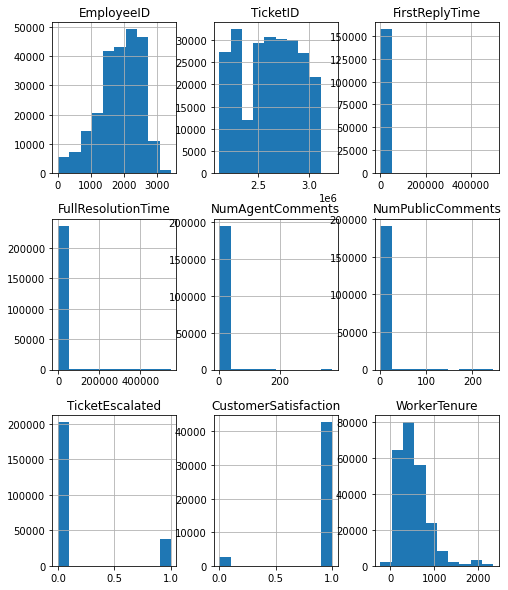

In [13]:
df.hist(figsize= (8,10))

#### Noticed that Workers Tenure (defined by the number of days between ticket creation and hire date) had negative values,  could mean that the Employees were assigned tickets after they resumed


(array([104132., 121546.,  10719.,   4268.]),
 array([-223.  ,  416.25, 1055.5 , 1694.75, 2334.  ]),
 <BarContainer object of 4 artists>)

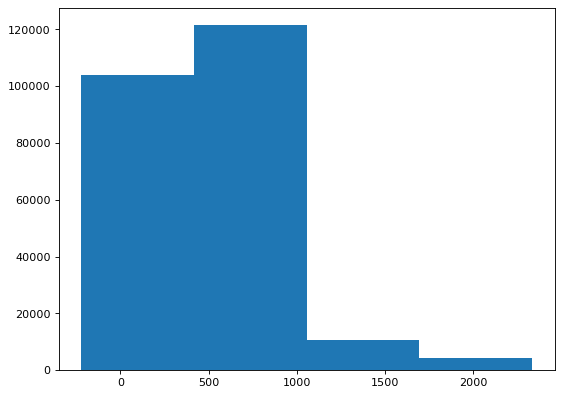

In [14]:
fig = plt.figure(figsize=(8,6), dpi =80)
ax = fig.add_subplot(1,1,1)
ax.hist(df['WorkerTenure'], bins= 4)

In [15]:
df.corr()

,EmployeeID,TicketID,FirstReplyTime,FullResolutionTime,NumAgentComments,NumPublicComments,TicketEscalated,CustomerSatisfaction,WorkerTenure
EmployeeID,1.000000,0.173500,-0.052591,-0.089498,-0.123982,-0.111294,-0.227105,0.013534,-0.922823
TicketID,0.173500,1.000000,-0.042073,-0.028931,0.010184,0.012107,-0.020168,-0.009592,0.093599
FirstReplyTime,-0.052591,-0.042073,1.000000,0.312852,0.066672,-0.013174,0.001018,-0.055248,0.045012
FullResolutionTime,-0.089498,-0.028931,0.312852,1.000000,0.367918,0.325644,0.224620,-0.136801,0.082985
NumAgentComments,-0.123982,0.010184,0.066672,0.367918,1.000000,0.851539,0.475299,-0.021527,0.111080
NumPublicComments,-0.111294,0.012107,-0.013174,0.325644,0.851539,1.000000,0.430574,-0.060151,0.102246
TicketEscalated,-0.227105,-0.020168,0.001018,0.224620,0.475299,0.430574,1.000000,0.002854,0.190295
CustomerSatisfaction,0.013534,-0.009592,-0.055248,-0.136801,-0.021527,-0.060151,0.002854,1.000000,-0.015430
WorkerTenure,-0.922823,0.093599,0.045012,0.082985,0.111080,0.102246,0.190295,-0.015430,1.000000


## Export Data

In [25]:
df.head()

,EmployeeID,TicketChannel,TicketGroup,TicketID,TicketCreatedDate,ZendeskPlan,DayTicketSolved,AssigneeTier,FirstReplyTime,FullResolutionTime,NumAgentComments,NumPublicComments,TicketEscalated,CustomerSatisfaction,WorkerDateHired,WorkerLocation,Worker_Type,WorkerTenure
0,1,api,Support (T1),2840334,2017-08-04,Trial,Sunday,Tier 1,13.0,33861.0,18.0,36.0,0,NaN,2011-10-18,London,Employee,2117
1,1,email,Support (T1),2136496,2017-01-09,Unknown,Wednesday,Tier 1,58.0,73659.0,30.0,70.0,1,1.0,2011-10-18,London,Employee,1910
2,1,facebook,Support (Triage),3034987,2017-10-12,Professional,Friday,Triage,30.0,1741.0,6.0,15.0,0,NaN,2011-10-18,London,Employee,2186
3,1,email,Support (T1),2311824,2017-03-02,Unknown,Sunday,Tier 1,78.0,25654.0,5.0,15.0,0,NaN,2011-10-18,London,Employee,1962
4,1,email,Support (T1),2213615,2017-01-30,Professional,Friday,Tier 1,4.0,16266.0,8.0,17.0,0,0.0,2011-10-18,London,Employee,1931


In [28]:
df.to_csv("20180410_advocacy_interview_data_cleaned.csv", mode = 'w', index=False)